<a href="https://colab.research.google.com/github/sijogeorge1234/Code_Chllenge_By_Sijo_George/blob/main/potato_chip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import scipy.stats as stats
%matplotlib inline
base_color=sns.color_palette()[9]

 
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


import warnings
warnings.simplefilter("ignore")

In [10]:
Transactions=pd.read_excel('QVI_transaction_data.xlsx')

In [11]:
Transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
#checking data general information
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [13]:
#checking for duplicates
Transactions[Transactions.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [14]:
def convert_to_datetime(num):
    dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + num - 2)
    return dt

In [15]:
Transactions['DATE'] = Transactions['DATE'].apply(convert_to_datetime)
Transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [16]:
#ammending data type
Transactions['STORE_NBR']=Transactions['STORE_NBR'].astype(str)
Transactions['LYLTY_CARD_NBR']=Transactions['LYLTY_CARD_NBR'].astype(str)
Transactions['TXN_ID']=Transactions['TXN_ID'].astype(str)
Transactions['PROD_NBR']=Transactions['PROD_NBR'].astype(str)
Transactions['PROD_NAME']=Transactions['PROD_NAME'].astype(str)

In [17]:
Transactions.drop(index=124845,inplace=True)

In [18]:
#checking for results
Transactions[Transactions.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [19]:
# Collecting the categorical columns into  list
cat_col=[]
for x in Transactions.dtypes.index:
    if Transactions.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME']

In [20]:
#checking for consistency of values in categorical columns mentioned in the previous list
for col in cat_col:
    print(col)
    print(Transactions[col].unique())
    print()
    print('*******')
    print()

STORE_NBR
['1' '2' '4' '5' '7' '8' '9' '13' '19' '20' '22' '23' '25' '33' '36' '38'
 '39' '41' '43' '45' '51' '54' '55' '56' '58' '59' '60' '62' '63' '67'
 '71' '72' '74' '75' '80' '81' '82' '83' '84' '88' '94' '96' '97' '101'
 '102' '104' '106' '109' '110' '111' '112' '114' '115' '116' '118' '119'
 '120' '122' '125' '128' '129' '130' '133' '149' '151' '152' '153' '156'
 '157' '160' '161' '164' '166' '167' '168' '169' '172' '173' '175' '178'
 '181' '184' '186' '187' '191' '194' '196' '197' '200' '205' '207' '208'
 '209' '212' '214' '215' '216' '217' '219' '222' '223' '225' '226' '227'
 '235' '236' '237' '241' '243' '246' '247' '248' '250' '253' '255' '256'
 '257' '262' '265' '266' '269' '271' '77' '3' '6' '10' '12' '15' '16' '17'
 '18' '21' '24' '26' '27' '28' '29' '30' '32' '34' '35' '37' '40' '46'
 '47' '48' '49' '50' '52' '53' '57' '61' '64' '65' '66' '68' '69' '70'
 '73' '78' '79' '86' '87' '89' '90' '91' '93' '95' '98' '100' '103' '105'
 '107' '108' '113' '117' '121' '123' '124' '

In [21]:
#checking for final results
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  datetime64[ns]
 1   STORE_NBR       264835 non-null  object        
 2   LYLTY_CARD_NBR  264835 non-null  object        
 3   TXN_ID          264835 non-null  object        
 4   PROD_NBR        264835 non-null  object        
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 18.2+ MB


In [22]:
Transactions.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [23]:
#creating a function to split packet size from product name
def packet_size(Transactions):
    string = Transactions["PROD_NAME"]
    num = []
    for i in string:
        if i.isdigit():
            num.append(i)
    number = "".join(num)
    return int(number)

In [24]:
#applying the function on product name column
Transactions["PACKET_SIZE"] = Transactions.apply(packet_size,axis=1)
Transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [25]:
Transactions['Transaction_year']=Transactions['DATE'].dt.year
Transactions['Transaction_month']=Transactions['DATE'].dt.month_name()
Transactions['Transaction_month_day']=Transactions['DATE'].dt.day
Transactions['Transaction_week_day']=Transactions['DATE'].dt.day_name()

In [26]:
# Ammending datatypes
Transactions['Transaction_year']=Transactions['Transaction_year'].astype(str)
Transactions['Transaction_month_day']=Transactions['Transaction_month_day'].astype(str)

In [27]:
# A function that will give us the boundries of the data which we should remove outliers after
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

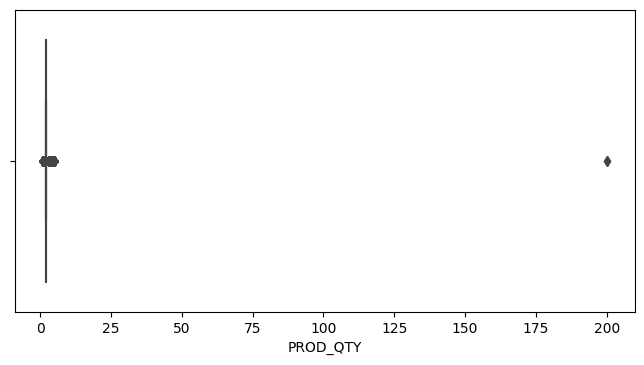

In [28]:
#Checking for outliers in product quantity column
plt.figure(figsize=(8,4),dpi=100);
sns.boxplot(Transactions['PROD_QTY'],color=base_color);

In [29]:
outlier_treatment(Transactions['PROD_QTY'])

(2.0, 2.0)

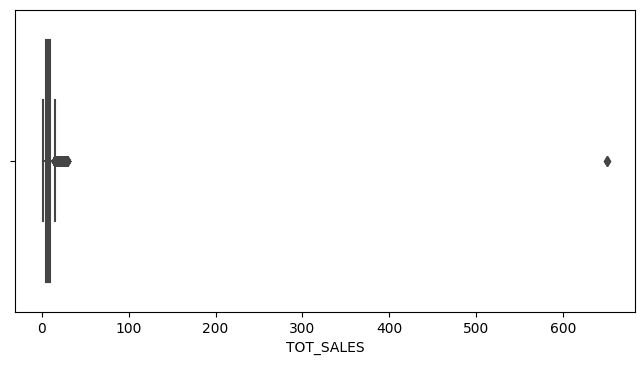

In [30]:
#Checking for outliers in total sales quantity column
plt.figure(figsize=(8,4),dpi=100);
sns.boxplot(Transactions['TOT_SALES'],color=base_color);

In [31]:
outlier_treatment(Transactions['TOT_SALES'])

(-0.29999999999999805, 14.899999999999999)

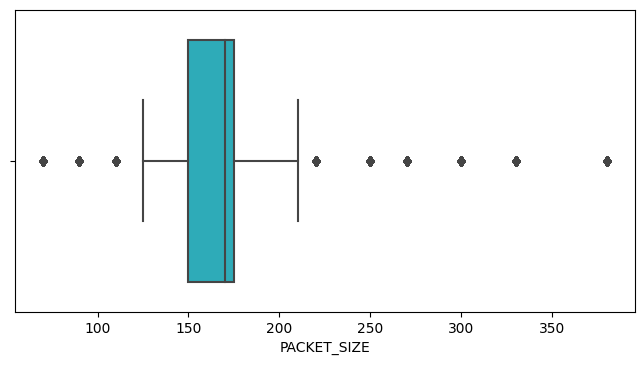

In [32]:
#Checking for outliers in product size column
plt.figure(figsize=(8,4),dpi=100);
sns.boxplot(Transactions['PACKET_SIZE'],color=base_color);

In [33]:
outlier_treatment(Transactions['PACKET_SIZE'])

(112.5, 212.5)

In [34]:
#Removing outliers
Transactions = Transactions[Transactions["PROD_QTY"] <=2]
Transactions = Transactions[Transactions["TOT_SALES"] <=15]
Transactions = Transactions[(Transactions["PACKET_SIZE"] <=213) & (Transactions["PACKET_SIZE"] >=111)]

In [35]:
#checking for final results
Transactions.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,Transaction_year,Transaction_month,Transaction_month_day,Transaction_week_day
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,2018,October,17,Wednesday
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,2019,May,20,Monday


In [ ]:
Transaction set ready for analysis

In [36]:
customers=pd.read_csv('QVI_purchase_behaviour.csv')

In [37]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [38]:
#checking for data general information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [39]:
customers[customers.duplicated()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [40]:
customers['LYLTY_CARD_NBR']=customers['LYLTY_CARD_NBR'].astype(str)

In [41]:
# Collecting the categorical columns into  list
cat_col=[]
for x in customers.dtypes.index:
    if customers.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [42]:
#checking for consistency of values in categorical columns mentioned in the previous list
for col in cat_col:
    print(col)
    print(customers[col].unique())
    print()
    print('*******')
    print()

LYLTY_CARD_NBR
['1000' '1002' '1003' ... '2370751' '2370961' '2373711']

*******

LIFESTAGE
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

*******

PREMIUM_CUSTOMER
['Premium' 'Mainstream' 'Budget']

*******



now the dtasets are ready for analysis

In [43]:
# Merging Transactions & customers into a df datasets
df=Transactions.merge(customers,on='LYLTY_CARD_NBR',how='inner')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191857 entries, 0 to 191856
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATE                   191857 non-null  datetime64[ns]
 1   STORE_NBR              191857 non-null  object        
 2   LYLTY_CARD_NBR         191857 non-null  object        
 3   TXN_ID                 191857 non-null  object        
 4   PROD_NBR               191857 non-null  object        
 5   PROD_NAME              191857 non-null  object        
 6   PROD_QTY               191857 non-null  int64         
 7   TOT_SALES              191857 non-null  float64       
 8   PACKET_SIZE            191857 non-null  int64         
 9   Transaction_year       191857 non-null  object        
 10  Transaction_month      191857 non-null  object        
 11  Transaction_month_day  191857 non-null  object        
 12  Transaction_week_day   191857 non-null  obje

Exploratory data analysis

In [45]:
#Checking general statistics
df.describe()

,PROD_QTY,TOT_SALES,PACKET_SIZE
count,191857.000000,191857.000000,191857.000000
mean,1.894244,6.913586,163.465519
std,0.307526,2.182373,18.536655
min,1.000000,1.700000,125.000000
25%,2.000000,5.400000,150.000000
50%,2.000000,7.200000,170.000000
75%,2.000000,8.800000,175.000000
max,2.000000,10.800000,210.000000


Univariate Analysis
here, we will investigate distributions of individual variables along the dataset

In [46]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,Transaction_year,Transaction_month,Transaction_month_day,Transaction_week_day,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,2018,October,17,Wednesday,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,2019,May,20,Monday,MIDAGE SINGLES/COUPLES,Budget


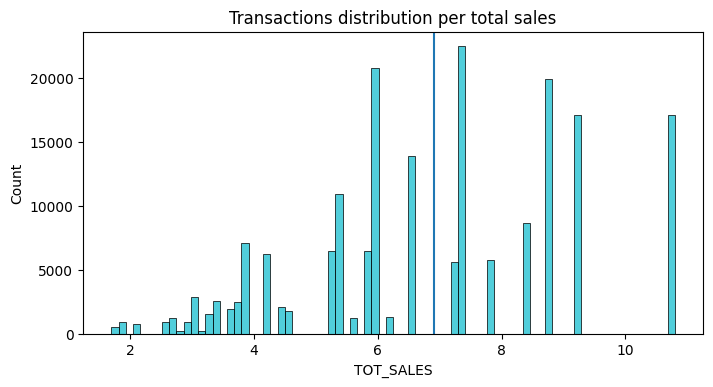

In [47]:
#Transactions distribution per sales
plt.figure(figsize=(8,4),dpi=100);
sns.histplot(df['TOT_SALES'],color=base_color);
plt.axvline(df['TOT_SALES'].mean())
plt.title('Transactions distribution per total sales');

In [48]:
df['TOT_SALES'].mean()

6.913585639304274

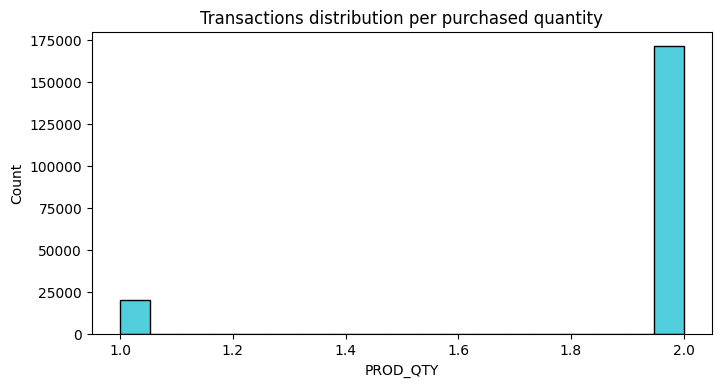

In [49]:
#Transactions distribution per purchased quantity
plt.figure(figsize=(8,4),dpi=100);
sns.histplot(df['PROD_QTY'],color=base_color);
plt.title('Transactions distribution per purchased quantity');

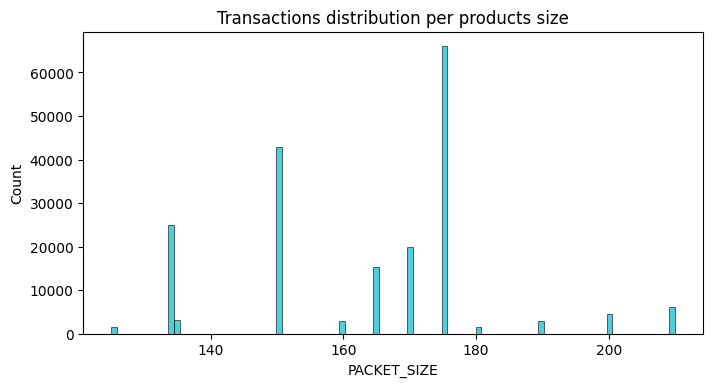

In [50]:
#Transactions distribution per product size
plt.figure(figsize=(8,4),dpi=100);
sns.histplot(df['PACKET_SIZE'],color=base_color);
plt.title('Transactions distribution per products size');

In [51]:
df['PACKET_SIZE'].mode()

0    175
dtype: int64

2018    50.470924
2019    49.529076
Name: Transaction_year, dtype: float64


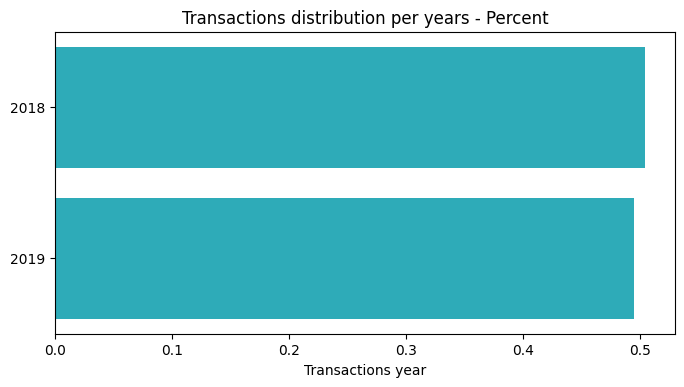

In [52]:
#Transactions distribution per years
plt.figure(figsize=(8,4),dpi=100);
counts = df['Transaction_year'].value_counts(normalize = True);
sns.barplot(x = counts.values, y = counts.index,color=base_color);
print(counts * 100);
plt.xlabel('Transactions year');
plt.title('Transactions distribution per years - Percent');
plt.show();

March        8.644459
July         8.598070
December     8.588688
October      8.449001
January      8.383327
November     8.324429
September    8.291071
June         8.286380
April        8.278562
May          8.221748
August       8.219664
February     7.714600
Name: Transaction_month, dtype: float64


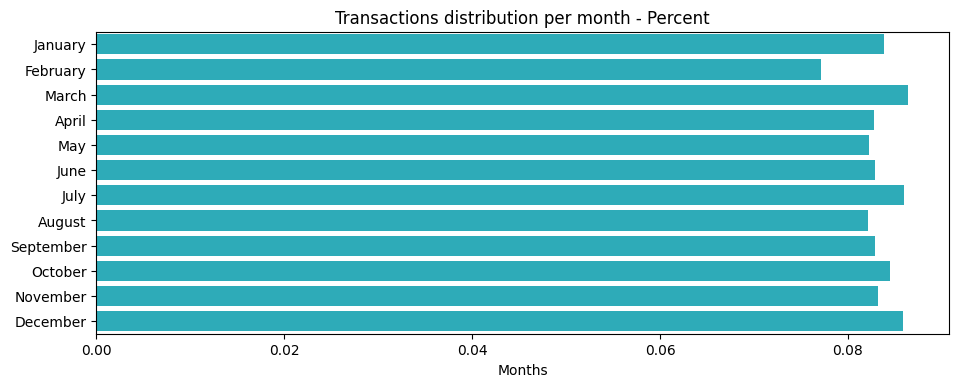

In [53]:
#Transactions distribution per months
plt.figure(figsize=(11,4),dpi=100);

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December']
month_categ = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['Transaction_month'] = df['Transaction_month'].astype(month_categ)
counts = df['Transaction_month'].value_counts(normalize = True);

sns.barplot(x =counts.values, y = counts.index,color=base_color);
print(counts * 100);
plt.xlabel('Months');
plt.title('Transactions distribution per month - Percent');
plt.show();

Sunday       14.704181
Friday       14.444612
Wednesday    14.266876
Saturday     14.250718
Monday       14.232475
Thursday     14.066727
Tuesday      14.034411
Name: Transaction_week_day, dtype: float64


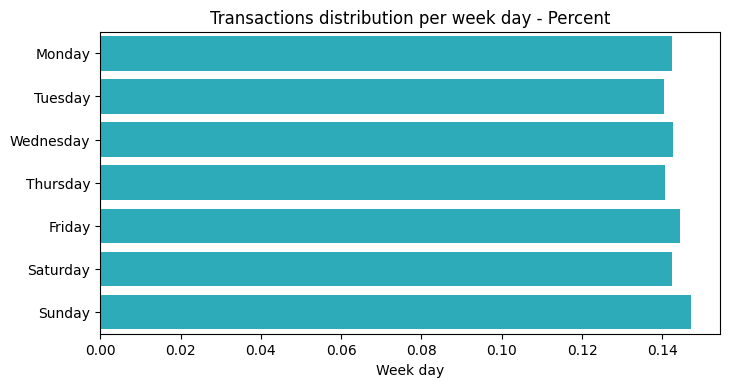

In [54]:
#Transactions distribution per week day
plt.figure(figsize=(8,4),dpi=100);

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['Transaction_week_day'] = df['Transaction_week_day'].astype(weekday_categ)
counts = df['Transaction_week_day'].value_counts(normalize = True);

sns.barplot(x = counts.values , y = counts.index,color=base_color);
print(counts * 100);
plt.xlabel('Week day');
plt.title('Transactions distribution per week day - Percent');
plt.show();

23    3.375431
9     3.363964
20    3.355624
4     3.350412
22    3.350412
Name: Transaction_month_day, dtype: float64


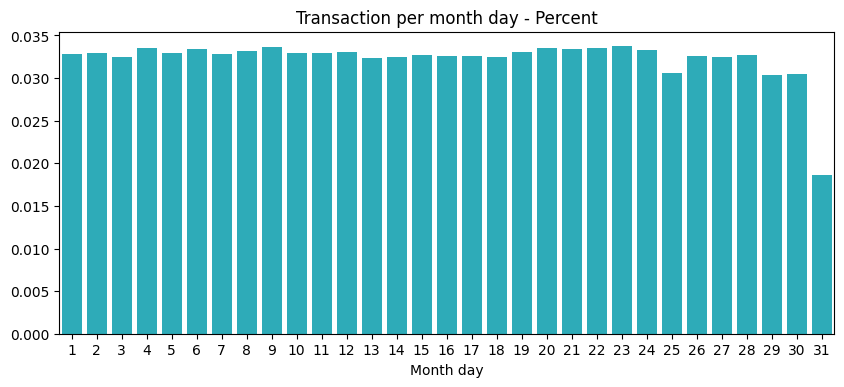

In [55]:
#Transactions distribution per month days
plt.figure(figsize=(10,4),dpi=100);

monthday = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
month_day = pd.api.types.CategoricalDtype(ordered=True, categories=monthday)
df['Transaction_month_day'] = df['Transaction_month_day'].astype(month_day)

counts = df['Transaction_month_day'].value_counts(normalize = True);
sns.barplot(x = counts.index, y = counts.values,color=base_color);
plt.xlabel('Month day');
plt.title('Transaction per month day - Percent');
print(counts.head() * 100)
plt.show();

OLDER SINGLES/COUPLES     20.539256
RETIREES                  18.670155
OLDER FAMILIES            18.528904
YOUNG FAMILIES            16.624361
YOUNG SINGLES/COUPLES     13.600234
MIDAGE SINGLES/COUPLES     9.415346
NEW FAMILIES               2.621744
Name: LIFESTAGE, dtype: float64


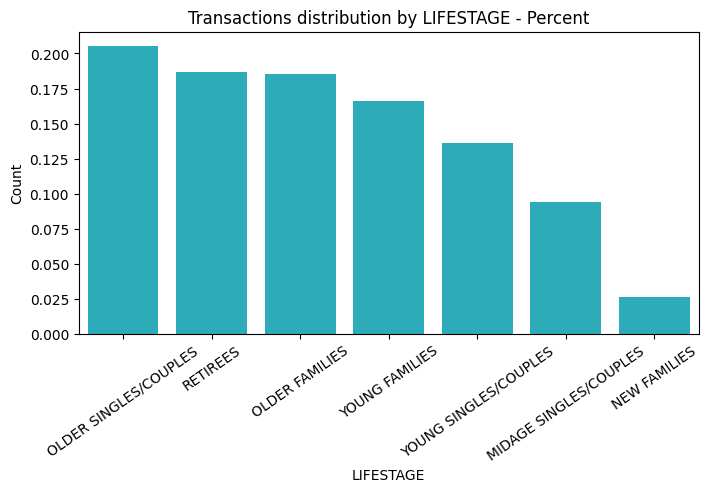

In [56]:
plt.figure(figsize=(8,4),dpi=100);
counts = df['LIFESTAGE'].value_counts(normalize = True)
#sns.barplot(x = counts.index, y = counts.values,color=base_color);
sns.barplot(x = counts.index, y = counts.values,color=base_color)

plt.xlabel('LIFESTAGE');
plt.ylabel('Count');
plt.xticks(rotation=35);
print(counts * 100)

plt.title("Transactions distribution by LIFESTAGE - Percent");
plt.show();

Mainstream    38.279552
Budget        35.341947
Premium       26.378501
Name: PREMIUM_CUSTOMER, dtype: float64


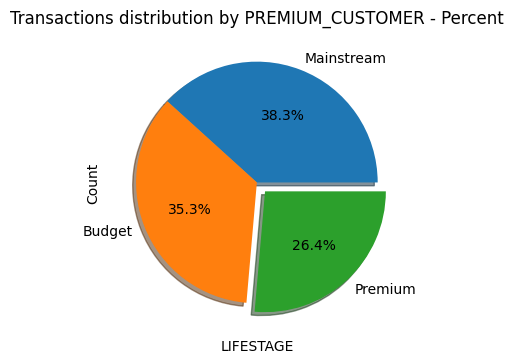

In [57]:
#Transactions distribution by LIFESTAGE
plt.figure(figsize=(8,4),dpi=100);
counts = df['PREMIUM_CUSTOMER'].value_counts(normalize = True)

counts.plot.pie(autopct='%1.1f%%', explode=(0, 0, 0.1),shadow=True)

plt.xlabel('LIFESTAGE');
plt.ylabel('Count');
plt.xticks(rotation=35);


print(counts * 100)

plt.title("Transactions distribution by PREMIUM_CUSTOMER - Percent");
plt.show();

The distribution(s) of variable(s) of interest:

 

1.   Total sales range from 2 to 12 amount of sales per transaction with mean of almost 7$ total sales per transaction
2.   Product quantity in different transactions varies between 1 and 2 quantities
3.   Most of the purchased products are with pack size of 175
4.   Transactions are slightly more in 2018 than 2019
5.   Transactions amount are almost the same over the months but it is the most in March and the least in February
6.   Transactions are distributed over the week with almost the same amount but it increases slightly on sunday
7.   Transactions are distributed over the days of the month with almost the same amount but it decreases by the end of the month in 29,30,31
8.   The chips are more popular among the old people than young people since older singles,retirees,older families buy more chips than younger segment
9.   Mainstream segment buy chips more frequently than other segments










Bivariate Analysis

In [58]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,Transaction_year,Transaction_month,Transaction_month_day,Transaction_week_day,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,2018,October,17,Wednesday,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,2019,May,20,Monday,MIDAGE SINGLES/COUPLES,Budget


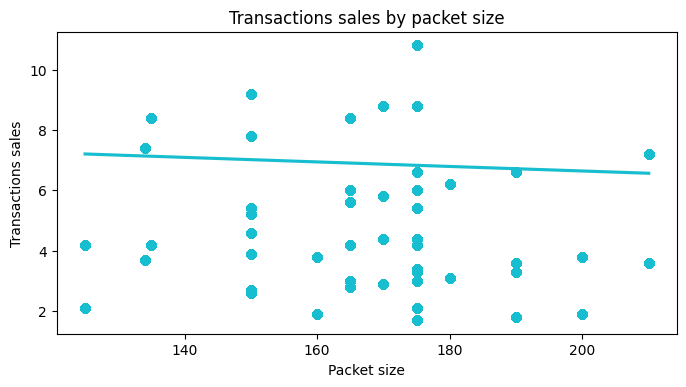

In [59]:
#Transactions sales amount by packet size
plt.figure(figsize=(8,4),dpi=100);
sns.regplot(data=df,x='PACKET_SIZE',y='TOT_SALES',color=base_color);
plt.xlabel('Packet size');
plt.ylabel('Transactions sales');
plt.title('Transactions sales by packet size');

In [60]:
#pearson correlation
df['PACKET_SIZE'].corr(df['TOT_SALES'])

-0.06388685193154418

LIFESTAGE
OLDER SINGLES/COUPLES     276153.3
RETIREES                  250265.5
OLDER FAMILIES            243700.8
YOUNG FAMILIES            219101.1
YOUNG SINGLES/COUPLES     176643.5
MIDAGE SINGLES/COUPLES    125722.4
NEW FAMILIES               34833.2
Name: TOT_SALES, dtype: float64


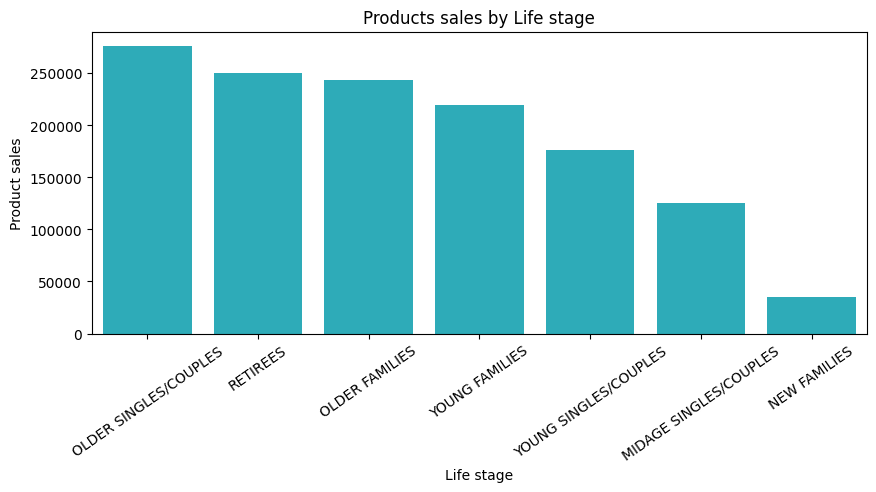

In [61]:
#Products sales by Life stage
plt.figure(figsize=(10,4),dpi=100);
counts = df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
sns.barplot(data=df,x=counts.index,y=counts.values,color=base_color);
plt.xlabel('Life stage');
plt.ylabel('Product sales');
plt.xticks(rotation=35)
plt.title('Products sales by Life stage');
print(counts)

PREMIUM_CUSTOMER
Mainstream    512050.9
Budget        466202.2
Premium       348166.7
Name: TOT_SALES, dtype: float64


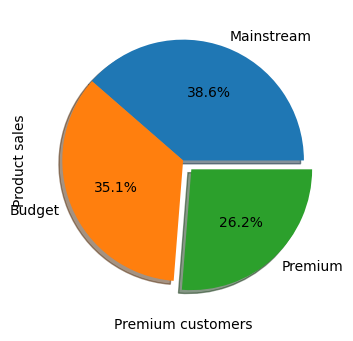

In [62]:
#Product Sales by premium customers
plt.figure(figsize=(10,4),dpi=100);
counts=df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False)

counts.plot.pie(autopct='%1.1f%%', explode=(0, 0, 0.1),shadow=True)

plt.xlabel('Premium customers');
plt.ylabel('Product sales');

print(counts)
plt.show()

Transaction_month
March        116106.7
December     115518.1
July         115380.8
October      113560.4
January      112333.1
November     111696.8
September    111573.6
June         111375.9
April        111017.2
February     103798.4
August       102459.3
May          101599.5
Name: TOT_SALES, dtype: float64


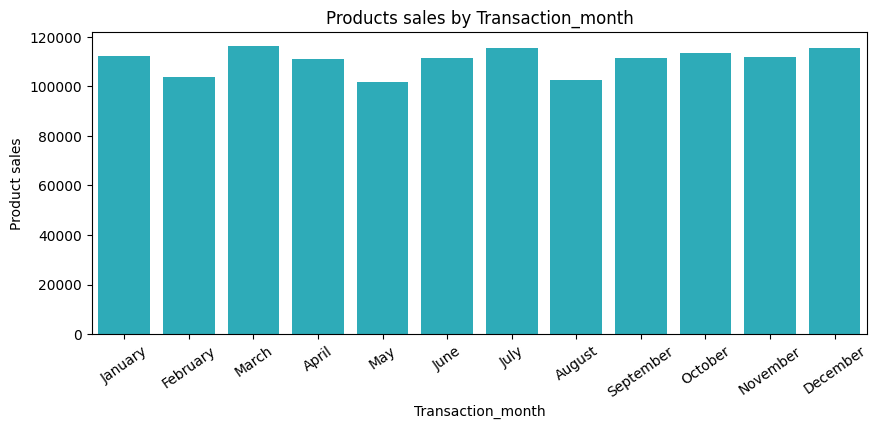

In [63]:
#Product Sales by Transaction_month
plt.figure(figsize=(10,4),dpi=100);
counts=df.groupby('Transaction_month')['TOT_SALES'].sum().sort_values(ascending=False)
sns.barplot(data=df,x=counts.index,y=counts.values,color=base_color);
plt.xlabel('Transaction_month');
plt.ylabel('Product sales');
plt.xticks(rotation=35)
plt.title('Products sales by Transaction_month');
print(counts)

Transaction_week_day
Sunday       195149.2
Friday       191557.0
Wednesday    189461.6
Monday       189174.2
Saturday     188576.8
Thursday     186584.4
Tuesday      185916.6
Name: TOT_SALES, dtype: float64


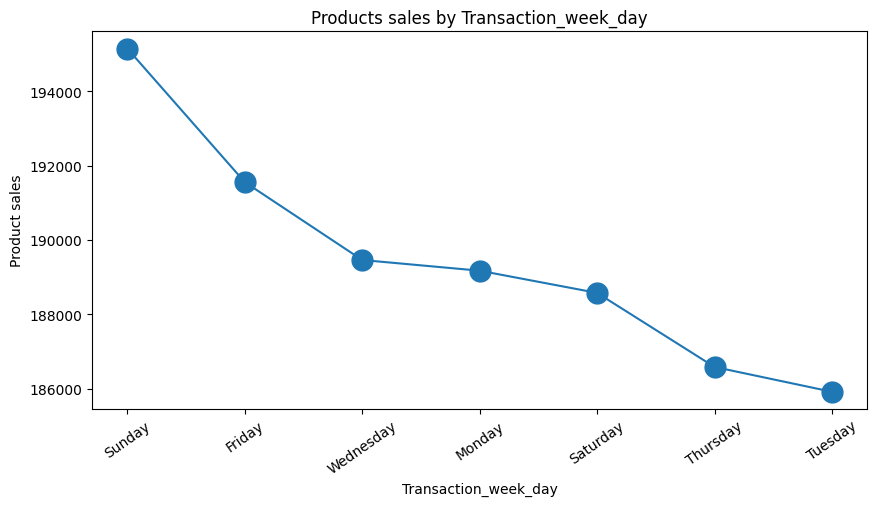

In [65]:
#Product Sales by Transaction_week_day
plt.figure(figsize=(10,4),dpi=100);
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['Transaction_week_day'] = df['Transaction_week_day'].astype(weekday_categ)
counts=df.groupby('Transaction_week_day')['TOT_SALES'].sum().sort_values(ascending=False)
counts.plot.line(figsize=(10,5),markersize=15,marker='o')


plt.xlabel('Transaction_week_day');
plt.ylabel('Product sales');
plt.xticks(rotation=35)
plt.title('Products sales by Transaction_week_day');
print(counts)

Some of the relationships observed in this part of the investigation:



1.   Most of the sales are coming from older singles/couples,retirees,older families
2.   Most of the sales are coming from Mainstream segment
3.   Most of the sales are coming in March
4.   Sales amount tend to be higher on sunday beacause people go
5.   shopping more often in their vacation than other days



Multivariate Analysis

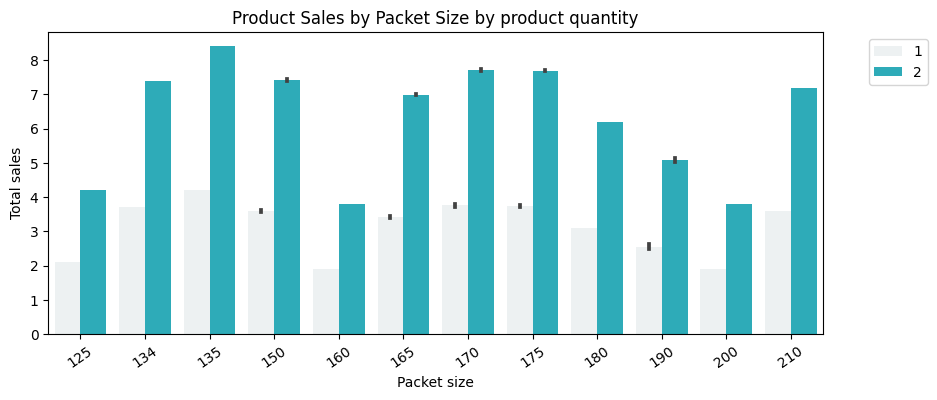

In [66]:
#Product Sales by Packet Size by product quantity
plt.figure(figsize=(10,4),dpi=100);
sns.barplot(data=df,x='PACKET_SIZE',y='TOT_SALES',hue='PROD_QTY',color=base_color);
plt.xlabel('Packet size');
plt.ylabel('Total sales');
plt.xticks(rotation=35);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title('Product Sales by Packet Size by product quantity');

    PREMIUM_CUSTOMER                               PROD_NAME  TOT_SALES
106       Mainstream  Kettle Mozzarella   Basil & Pesto 175g    13105.8
19            Budget  Kettle Mozzarella   Basil & Pesto 175g    11993.4
193          Premium  Kettle Mozzarella   Basil & Pesto 175g     8834.4


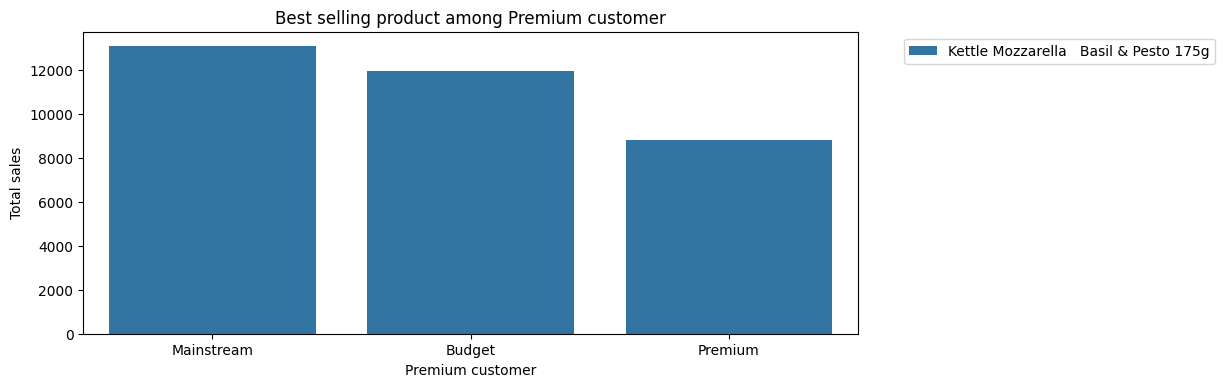

In [67]:
# Best selling products among Premium customer
Most_selling_premium=df[['PREMIUM_CUSTOMER','PROD_NAME','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','PROD_NAME'],as_index=False).agg({'TOT_SALES':'sum'}).sort_values(by='TOT_SALES',ascending=False)
#since the most selling product among all premium customer segments is Kettle Mozzarella   Basil & Pesto, i will crete a dataframe for it to visualize it
Most_selling_premium1=Most_selling_premium[Most_selling_premium['PROD_NAME']=='Kettle Mozzarella   Basil & Pesto 175g']

plt.figure(figsize=(10,4),dpi=100);
sns.barplot(data=Most_selling_premium1,x='PREMIUM_CUSTOMER',y='TOT_SALES',hue='PROD_NAME');
plt.xlabel('Premium customer');
plt.ylabel('Total sales');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title('Best selling product among Premium customer');
print(Most_selling_premium1)

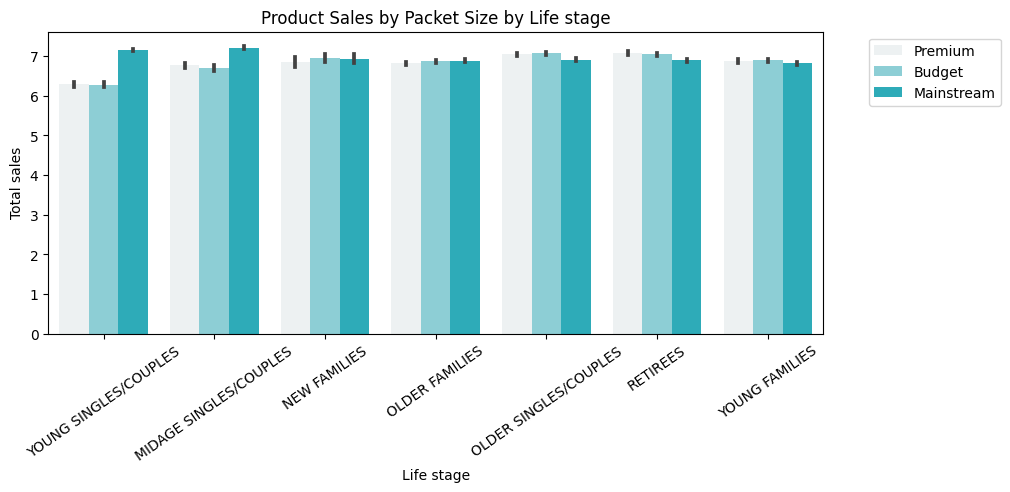

In [68]:
#Product Sales by packet size by Life stage
plt.figure(figsize=(10,4),dpi=100);
sns.barplot(data=df,x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',color=base_color);
plt.xlabel('Life stage');
plt.ylabel('Total sales');
plt.xticks(rotation=35);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title('Product Sales by Packet Size by Life stage');

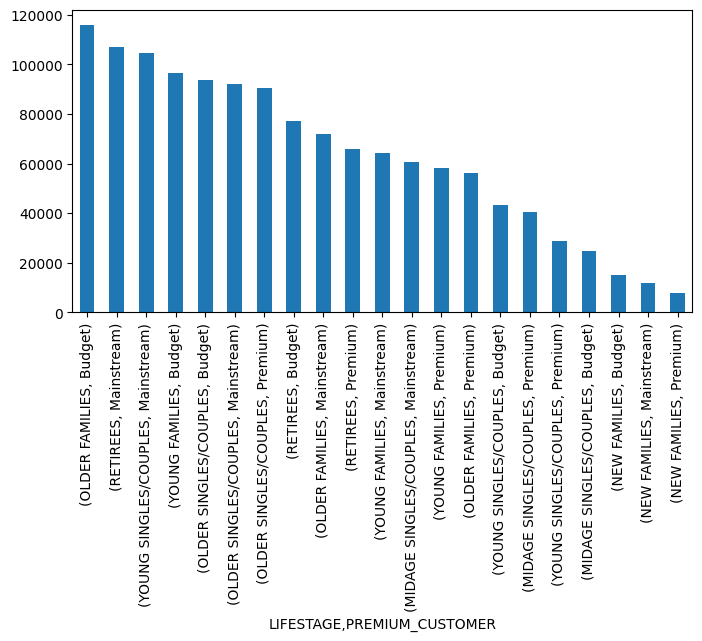

In [69]:
#Product Sales by Premium customer by Life stage
plt.figure(figsize=(8,4),dpi=100);
df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).plot.bar();

In [70]:
#What is the most admired product for these segments?
df1=df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_NAME','TOT_SALES']]
df1=df1[(df1['LIFESTAGE']=='OLDER FAMILIES') | (df1['LIFESTAGE']=='RETIREES') | (df1['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
df1=df1[(df1['PREMIUM_CUSTOMER']=='Budget') | (df1['PREMIUM_CUSTOMER']=='Mainstream')]
df1.head(5)

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,TOT_SALES
23095,OLDER FAMILIES,Budget,Kettle Sweet Chilli And Sour Cream 175g,10.8
23096,OLDER FAMILIES,Budget,Tostitos Lightly Salted 175g,8.8
23097,OLDER FAMILIES,Budget,Kettle Honey Soy Chicken 175g,10.8
23098,OLDER FAMILIES,Budget,Kettle Sensations BBQ&Maple 150g,9.2
23099,OLDER FAMILIES,Budget,Tyrrells Crisps Ched & Chives 165g,8.4


In [71]:
df1.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','PROD_NAME'])['TOT_SALES'].sum().sort_values(ascending=False).head(1)

LIFESTAGE              PREMIUM_CUSTOMER  PROD_NAME                             
YOUNG SINGLES/COUPLES  Mainstream        Kettle Mozzarella   Basil & Pesto 175g    3358.8
Name: TOT_SALES, dtype: float64


Some of the relationships you observed in this part of the investigation:

1. Kettle products are most popular among the most purchasing segment
2. Most sales driving packet size is 135 which is bought mostly in 1 units or 2 units per transaction
3. The best selling product among all Mainstream,budget,premium customers segments is Kettle Mozzarella Basil & Pesto 175g
4. Most sales are made by OLDER FAMILIES in the budget segment,RETIREES,YOUNG SINGLES/COUPLES in Mainstream segment
5. The most admired product is (Kettle Mozzarella Basil & Pestoamong) among Young singles/couples - Mainstream & Older Families Budget & Kettle Honey Soy Chicken among Retirees

**Conclusions**


Transactions are almost done on sunday since it's a vacation and everyone is free for shopping so the sales amount increases on that day, most of our sales in general are coming from singles/couples,retirees,older families they seem to admire chips more than younger people, most of them are from mainstream segment, people tend to like kettle chips more than any other chips,Kettle Mozzarella Basil & Pesto 175g has the highest sales record

We have made further investigation to find more precise results and found out that the best customers that derive the highest amount of sales to us are older families in budget segment,Retirees & young singles/couples in Mainstream segment so we should increase our marketing effort towards them ,the most admired product for them is (Kettle Mozzarella Basil & Pesto 175 g)